In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fonction_stage as st
from numpy.fft import fft 
from numpy.fft import ifft, irfft 
import scipy as sp
from scipy.signal import butter, lfilter, filtfilt
from scipy.signal import freqz

In [2]:
######### A MODIFIER ###########

data=np.loadtxt('resu_z_his_vit.txt',skiprows=53)
name='as_hist_vit'

mail_fmax=40 
################################
freq=data[:,0]
df=freq[2]-freq[1]
tsimu=1/df
fmax=np.max(freq)
fNy=fmax/2
dt=1/fmax


shape=np.shape(data)
recep=int((shape[1]-1)/2)
ech=int(shape[0])


temps=np.arange(0,tsimu,dt)
temps2=np.arange(0,(tsimu-dt)*2,dt)


print("df, pas en fréquence=", df, "Hz")
print("tsimu =", tsimu, "s")
print("fNy =", fNy, "Hz")
print("fmax =", fmax, "Hz")
print("dt =", dt, "s")
print("echantillon =", ech)

df, pas en fréquence= 2.0 Hz
tsimu = 0.5 s
fNy = 35.0 Hz
fmax = 70.0 Hz
dt = 0.014285714285714285 s
echantillon = 35


In [3]:
shape=np.shape(data)
recep=int((shape[1]-1)/2)
ech=int(shape[0])


temps=np.arange(0,tsimu,dt)
temps2=np.arange(0,(tsimu-dt)*2,dt)


In [4]:
real_data=np.ones((ech,recep),dtype="complex")
imag_data=np.ones((ech,recep),dtype="complex")
complex_data=np.ones((ech,recep),dtype="complex")

In [5]:
for i in range(recep):
    imaginaire=data[:,(i+1)*2]
    imag_data[:,i]=imaginaire
    reel=data[:,((i+1)*2)-1]
    real_data[:,i]=reel

In [6]:
complex_data.real=real_data
complex_data.imag=imag_data

np.savetxt("aster1.txt", complex_data, fmt="%+.4e")

C:\Users\Pauli\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.
C:\Users\Pauli\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [7]:
recep_list=np.linspace(1,24,24)

nfreq, nrecp = (recep, ech)
nrecp, nfreq = np.meshgrid(recep_list, freq)

ntemps, nrecp = (recep, ech)
nrecp, ntemps = np.meshgrid(recep_list, temps)


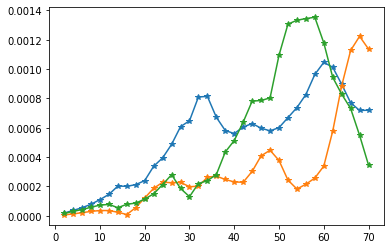

In [8]:
spectre=np.abs(complex_data)

plt.figure()
plt.plot(freq,spectre[:,0],"-*")
plt.plot(freq,spectre[:,11],"-*")
plt.plot(freq,spectre[:,23],"-*")

a=[freq,spectre[:,0] ]
np.savetxt("astertest.txt", a)

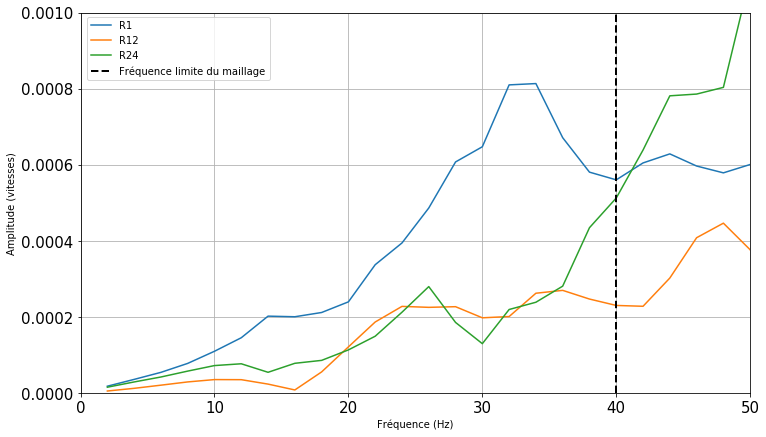

In [9]:
#figure comparaison 

plt.figure(figsize= (12,7))


plt.plot(freq,spectre[:,0], label="R1")
plt.plot(freq,spectre[:,11], label="R12")
plt.plot(freq,spectre[:,23], label="R24")


plt.plot([mail_fmax, mail_fmax],[0,0.001],  'k--', lw=2, label="Fréquence limite du maillage")

plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude (vitesses)')
plt.xlim(0,50)
plt.ylim(0,0.001)
plt.tick_params(axis = 'both', labelsize =15)

plt.legend(bbox_to_anchor=(0.01, 0.99), loc=2, borderaxespad=0.)
plt.grid()
figtransfil="_TF.png"
namefigtransfil=name+figtransfil
plt.savefig(namefigtransfil)

datafil="_spectre.png"
namedatafil=name+datafil
np.savetxt(namedatafil, spectre)

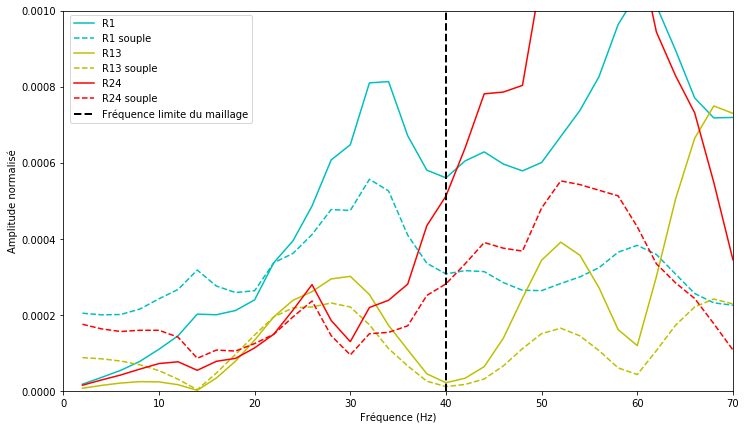

In [10]:
souple= np.loadtxt("histcomp.txt")

#figure comparaison avec souple 
norma=(spectre[10,0]/souple[10,0])

plt.figure(figsize= (12,7))

plt.plot(freq,spectre[:,0],'c', label="R1")
plt.plot(freq,souple[:,0]*norma, 'c--', label="R1 souple")

plt.plot(freq,spectre[:,12],'y', label="R13")
plt.plot(freq,souple[:,12]*norma,'y--', label="R13 souple")


plt.plot(freq,spectre[:,23],'r', label="R24")
plt.plot(freq,souple[:,23]*norma,'r--', label="R24 souple")



plt.plot([mail_fmax, mail_fmax],[0,1],  'k--', lw=2, label="Fréquence limite du maillage")

plt.xlabel('Fréquence (Hz)')
plt.ylabel('Amplitude normalisé')
plt.xlim(0,70)
plt.ylim(0,0.001)

plt.legend(bbox_to_anchor=(0.01, 0.99), loc=2, borderaxespad=0.)

figtransfil="_TFcomp.png"
namefigtransfil=name+figtransfil
plt.savefig(namefigtransfil)

In [11]:
data[:,0]

array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24., 26.,
       28., 30., 32., 34., 36., 38., 40., 42., 44., 46., 48., 50., 52.,
       54., 56., 58., 60., 62., 64., 66., 68., 70.])

Text(0, 0.5, 'y')

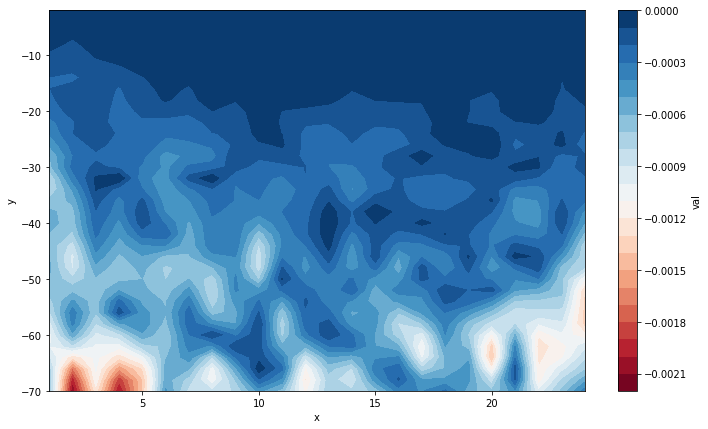

In [12]:

plt.figure(figsize= (12,7))
cf = plt.contourf(nrecp,-nfreq,-spectre,20, cmap='RdBu')
plt.colorbar(label = 'val')
plt.contour(cf,colors = 'k',linewidths = 0,alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
    

Text(0, 0.5, 'y')

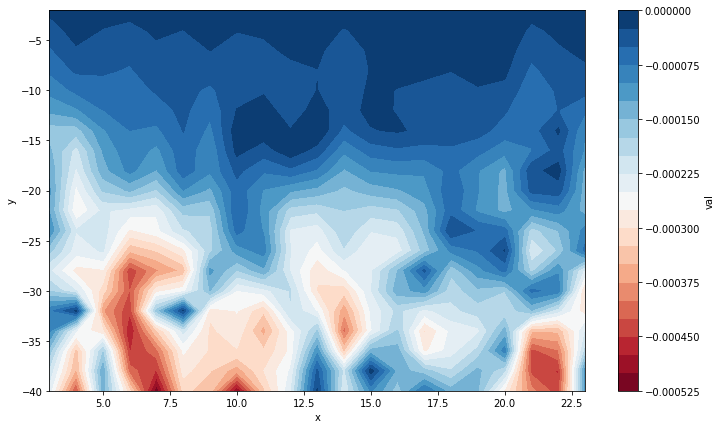

In [13]:

plt.figure(figsize= (12,7))
cf = plt.contourf(nrecp[0:20,2:23],-nfreq[0:20,2:23],-spectre[0:20,2:23],20, cmap='RdBu')
plt.colorbar(label = 'val')
plt.contour(cf,colors = 'k',linewidths = 0,alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')

In [14]:
complex_d=np.transpose(complex_data)
signal = irfft(complex_d)

    
signal_t=np.transpose(signal)
np.shape(signal_t)

(68, 24)

In [15]:
ntemps, nrecp = (recep,(ech-1)*2)
nrecp, ntemps = np.meshgrid(recep_list, temps2)

np.shape(ntemps)

(68, 24)

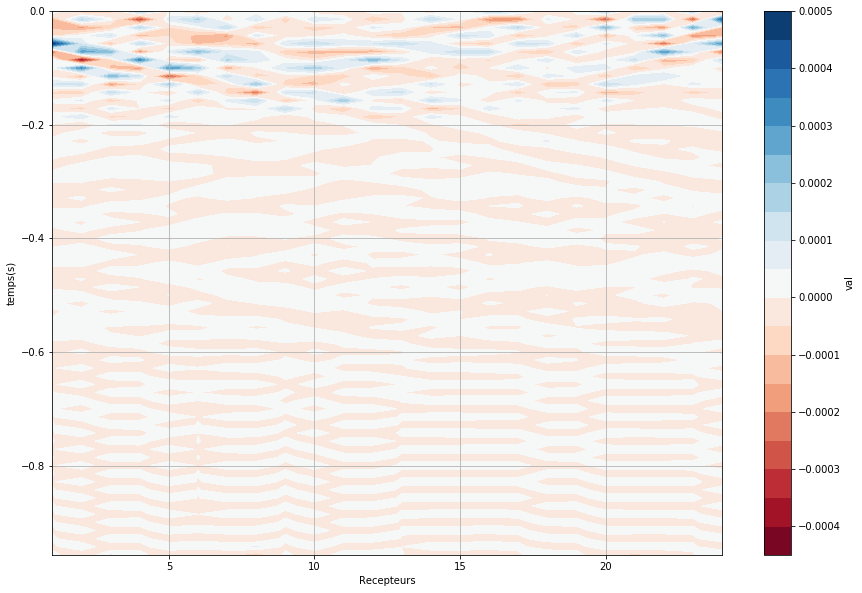

In [16]:
plt.figure(figsize=(15,10))
cf = plt.contourf(nrecp,-ntemps,-signal_t,20, cmap='RdBu')
plt.colorbar(label = 'val')
plt.contour(cf,colors = 'k',linewidths = 0,alpha=0.5)
plt.xlabel('Recepteurs')
plt.ylabel('temps(s)')
    
plt.grid()

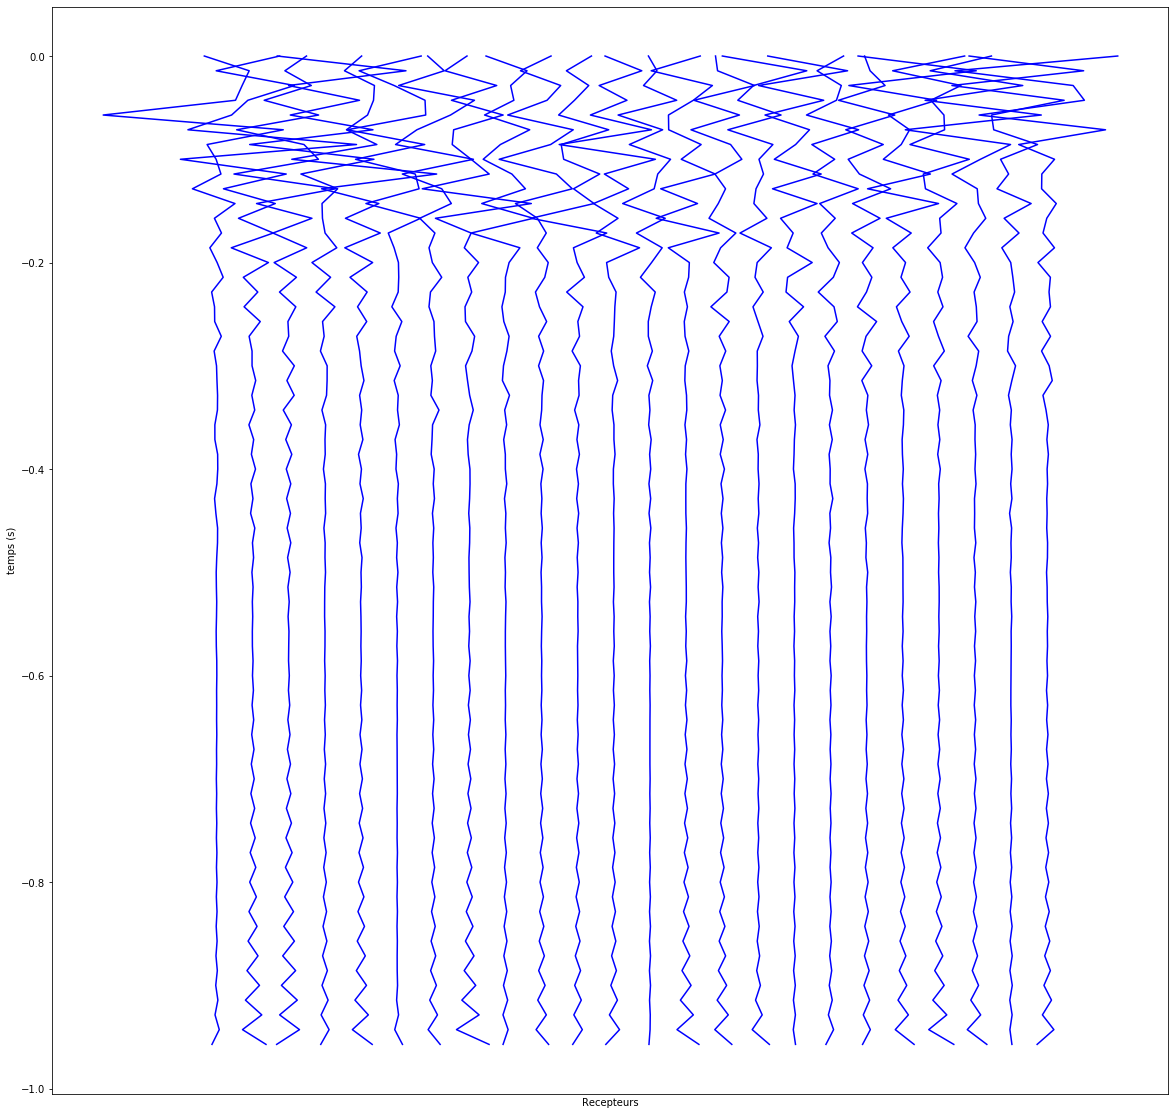

In [17]:
aux=np.max(signal_t)
vecteur=np.linspace(0,(aux/3)*recep,recep)

mat=np.ones((((ech-1)*2),1))*vecteur

data_p=signal_t+mat

plt.figure(figsize=(20,20))
plt.plot(data_p, -temps2,'b')
plt.xlabel("Recepteurs")
plt.ylabel("temps (s)")
plt.xticks([]) ;

figwave="wave.png"
namefigwave=name+figwave
plt.savefig(namefigwave)

np.savetxt('data-temps-aster_hist_vit.txt', data_p)